In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

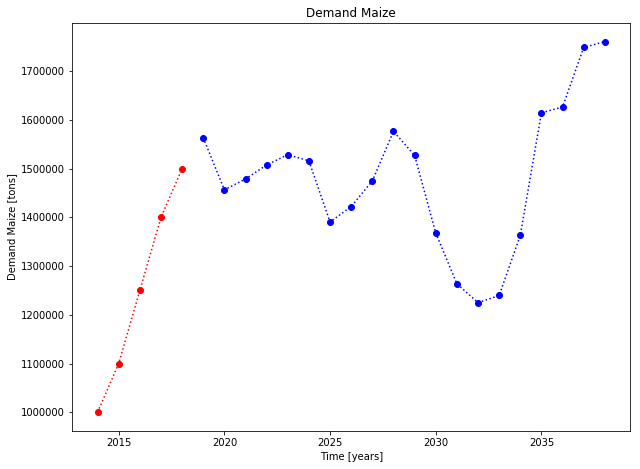

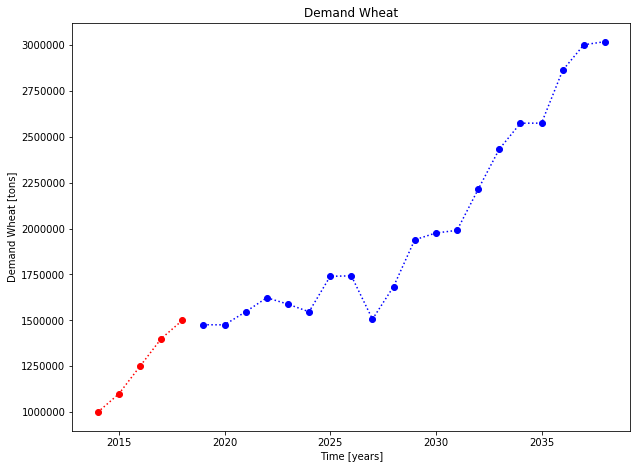

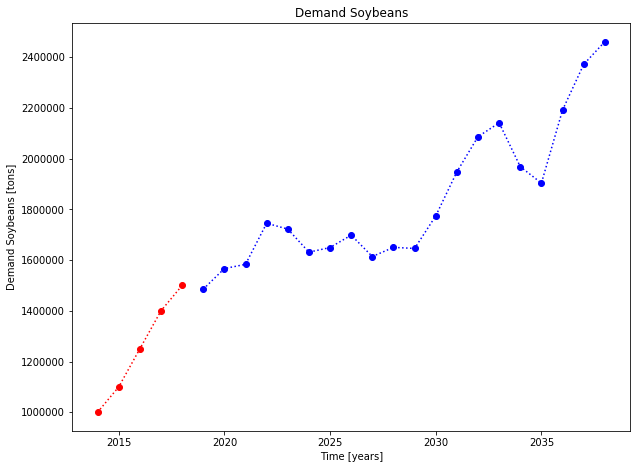

In [2]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random()
wheat.scenario_random()
soybeans.scenario_random()

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [3]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [4]:
# instantiate System object
Terminal = system.System(elements = demand + vessels)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [5]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 98
     Handysize calls: 44
     Handymax calls: 31
     Panamax calls: 23
  Total cargo volume: 4525332
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 2.249652777777778
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 1.1562366452991453
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.7917646011396012
  *** add Berth to elements
     Berth occupancy (after adding berth): 0.7917646011396012
  *** add Quay to elements
     Berth occupancy (after adding quay

## Report all elements

In [6]:
for element in Terminal.elements:
    print("")
    print(element.name)
    print("")
    print(element.__dict__)


Maize

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1563317
1   2020  1456528
2   2021  1478834
3   2022  1507544
4   2023  1528762
5   2024  1515872
6   2025  1390443
7   2026  1422219
8   2027  1474836
9   2028  1576621
10  2029  1527213
11  2030  1368017
12  2031  1263743
13  2032  1224979
14  2033  1239708
15  2034  1363054
16  2035  1614635
17  2036  1626529
18  2037  1748778
19  2038  1760682, 'handling_fee': 3, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Maize', 'id': '15036d7a-496e-11e9-b14b-c8ff2870e0c9'}

Wheat

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1476457
1   2020  1475862
2   2021  1546966
3   2022  1623426
4   2023  1588606
5   2024  1547042
6   2025  1740015
7   2026  1742681
8   2027  1506648
9   2

19  2038         0     241500.0   241500.0  786240.0  2160.0}

Harbour_crane_01

{'triggers': [], 'renevue': [], 'labour': 2160.0, 'maintenance': 241500.0, 'energy': 786240.0, 'insurance': 120750.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 12075000, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'unit_rate': 10500000, 'mobilisation_perc': 0.15, 'maintenance_perc': 0.02, 'consumption': 210, 'insurance_perc': 0.01, 'crew': 3, 'crane_type': 'Harbour crane', 'lifting_capacity': 40, 'hourly_cycles': 40, 'eff_fact': 0.4, 'payload': 28, 'peak_capacity': 1120, 'effective_capacity': 448, 'year_purchase': [], 'year_online': 2020, 'name': 'Harbour_crane_01', 'id': '157f8ff4-496e-11e9-aa37-c8ff2870e0c9', 'df':     year     capex  maintenance  insurance    energy  labour
0   2019  12075000     241500.0   241500.0  786240.0  2160.0
1   2020         0     241500.0   241500.0  786240.0  2160.0
2   2021         0     241500.0   241500.0  786240.0  2160.0
3   2022   

## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [7]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [berth, screw],
         [crane, conveyor1],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)